<a href="https://colab.research.google.com/github/Sathvika-Vunnam/Cyclistic-Case-Study/blob/main/Cyclistic_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [ ]:
sns.set_palette("Set2")

In [ ]:
july_2020_df = pd.read_csv("202006-divvy-tripdata[1].csv")
august_2020_df = pd.read_csv("202007-divvy-tripdata[1].csv")
september_2020_df = pd.read_csv("202008-divvy-tripdata[1].csv")
october_2020_df = pd.read_csv("202009-divvy-tripdata[1].csv")
november_2020_df = pd.read_csv("202010-divvy-tripdata[1].csv")
december_2020_df = pd.read_csv("202011-divvy-tripdata[1].csv")
january_2021_df = pd.read_csv("202012-divvy-tripdata[1].csv")
february_2021_df = pd.read_csv("202101-divvy-tripdata[1].csv")
march_2021_df = pd.read_csv("202102-divvy-tripdata[1].csv")
april_2021_df = pd.read_csv("202103-divvy-tripdata[1].csv")
may_2021_df = pd.read_csv("202104-divvy-tripdata[1].csv")
june_2021_df = pd.read_csv("202105-divvy-tripdata[1].csv")

In [ ]:
#create a list of dataframes
frames = [
    july_2020_df,
    august_2020_df,
    september_2020_df,
    october_2020_df,
    november_2020_df,
    december_2020_df,
    january_2021_df,
    february_2021_df,
    march_2021_df,
    april_2021_df,
    may_2021_df,
    june_2021_df,
]

In [ ]:
#Check the no.of columns for all the dataframes
num_cols = []

In [ ]:
def verify_num_of_cols(frames):
    for frame in frames:
        num_cols.append(len(frame.columns))
    return num_cols

In [ ]:
# print(verify_num_of_cols(frames=frames))

In [ ]:
#Create a single dataframe that combines the 12 dataframes
df = pd.concat(frames, axis=0, ignore_index=True)
print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [ ]:
# Summary of the data
print(df.head(10))
print(df.info())

            ride_id rideable_type           started_at             ended_at  \
0  8CD5DE2C2B6C4CFC   docked_bike  2020-06-13 23:24:48  2020-06-13 23:36:55   
1  9A191EB2C751D85D   docked_bike  2020-06-26 07:26:10  2020-06-26 07:31:58   
2  F37D14B0B5659BCF   docked_bike  2020-06-23 17:12:41  2020-06-23 17:21:14   
3  C41237B506E85FA1   docked_bike  2020-06-20 01:09:35  2020-06-20 01:28:24   
4  4B51B3B0BDA7787C   docked_bike  2020-06-25 16:59:25  2020-06-25 17:08:48   
5  D50DF288196B53BE   docked_bike  2020-06-17 18:07:18  2020-06-17 18:18:14   
6  165FA6D223E58600   docked_bike  2020-06-25 07:24:33  2020-06-25 07:31:11   
7  D8236CFC050E591C   docked_bike  2020-06-19 00:00:56  2020-06-19 00:09:15   
8  9D82B9B53C37C55C   docked_bike  2020-06-30 12:11:36  2020-06-30 12:32:43   
9  3DFF4AB10A6895A3   docked_bike  2020-06-28 14:17:09  2020-06-28 14:27:51   

               start_station_name start_station_id          end_station_name  \
0        Wilton Ave & Belmont Ave              117

Data Cleaning

In [ ]:
# Columns with missing values
print(df.isnull().sum())

ride_id                    0
rideable_type              1
started_at                 2
ended_at                   2
start_station_name    181052
start_station_id      181533
end_station_name      204878
end_station_id        205233
start_lat                  4
start_lng                  4
end_lat                 3518
end_lng                 3518
member_casual              4
dtype: int64


In [ ]:
# Rows missing values
print(df[df.isnull().any(axis=1)])

                  ride_id  rideable_type           started_at  \
800      8F5DC3FE5B22E480    docked_bike  2020-06-04 07:24:22   
1266     9358687FAE5EEC17    docked_bike  2020-06-28 13:58:51   
2354     5399B46884E18D40    docked_bike  2020-06-21 19:08:51   
2492     EA8792DAAD74C5DA    docked_bike  2020-06-04 08:46:31   
2957     69D0294D7C1727E8    docked_bike  2020-06-17 09:51:33   
...                   ...            ...                  ...   
3094139  A87018C1286BE8FC  electric_bike  2021-05-11 22:46:53   
3094140  D0B8E59E2B3C406D  electric_bike  2021-05-02 17:48:17   
3094141  EF56D7D1D612AC11  electric_bike  2021-05-20 16:32:14   
3094143  428575BAA5356BFF  electric_bike  2021-05-31 14:24:54   
3094144  FC8A4A7AB7249662  electric_bike  2021-05-25 16:01:33   

                    ended_at               start_station_name  \
800      2020-06-04 07:58:23          Broadway & Cornelia Ave   
1266     2020-06-28 18:23:31           Michigan Ave & Lake St   
2354     2020-06-21 20:2

In [ ]:
# Examine the first row with missing values further
print(df.iloc[800])

ride_id                      8F5DC3FE5B22E480
rideable_type                     docked_bike
started_at                2020-06-04 07:24:22
ended_at                  2020-06-04 07:58:23
start_station_name    Broadway & Cornelia Ave
start_station_id                          303
end_station_name                          NaN
end_station_id                            NaN
start_lat                           41.945529
start_lng                          -87.646439
end_lat                                   NaN
end_lng                                   NaN
member_casual                          member
Name: 800, dtype: object


In [ ]:
# Find out the total number of rows that contain null values
sum_of_rows_with_null_values = df.isnull().any(axis=1).sum()
print(f"Total Null rows: {sum_of_rows_with_null_values}")

Total Null rows: 280736


In [ ]:
# Percentage of rows with missing values in the dataset
pc_nan_rows = sum_of_rows_with_null_values / df.shape[0] * 100
print(f"PC of null rows: {pc_nan_rows}")

PC of null rows: 9.073133588395635


In [ ]:
#Drop rows with missing data
clean_df = df.dropna(axis="index")

In [ ]:
# Check if new df has any missing values
print(clean_df.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [ ]:
# Check if any ID's are duplicate
total_duplicate_rows = clean_df.duplicated().sum()
print(f"Duplicate rows: {total_duplicate_rows}")

Duplicate rows: 0


In [ ]:
# Cleaned dataframe
print(clean_df)
print(clean_df.info())

                  ride_id  rideable_type           started_at  \
0        8CD5DE2C2B6C4CFC    docked_bike  2020-06-13 23:24:48   
1        9A191EB2C751D85D    docked_bike  2020-06-26 07:26:10   
2        F37D14B0B5659BCF    docked_bike  2020-06-23 17:12:41   
3        C41237B506E85FA1    docked_bike  2020-06-20 01:09:35   
4        4B51B3B0BDA7787C    docked_bike  2020-06-25 16:59:25   
...                   ...            ...                  ...   
3094136  6AFB0C7D4D89F1B0   classic_bike  2021-05-01 15:28:11   
3094137  187B36C368311E5B  electric_bike  2021-05-12 18:37:36   
3094138  43C517C9DD4CF4B2    docked_bike  2021-05-22 17:45:09   
3094142  745191CB9F21DE3C   classic_bike  2021-05-29 16:40:37   
3094145  E873B8AA3EE84678    docked_bike  2021-05-12 12:22:14   

                    ended_at           start_station_name start_station_id  \
0        2020-06-13 23:36:55     Wilton Ave & Belmont Ave              117   
1        2020-06-26 07:31:58         Federal St & Polk St      

Process Data

In [ ]:
# transform started_at and ended_at into datetime
clean_df["started_at"] = pd.to_datetime(clean_df["started_at"])
clean_df["ended_at"] = pd.to_datetime(clean_df["ended_at"])

<ipython-input-22-67f5e276ed90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["started_at"] = pd.to_datetime(clean_df["started_at"])
<ipython-input-22-67f5e276ed90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["ended_at"] = pd.to_datetime(clean_df["ended_at"])


In [ ]:
# Sort dataframe in descending order based on ended_at colum
clean_df.sort_values(by=["ended_at"], inplace=True, ascending=False)
print(clean_df)

                  ride_id rideable_type          started_at  \
2740997  C4896415C76C8463   docked_bike 2021-05-23 17:41:59   
2752587  583824DCF443DD0B   docked_bike 2021-05-30 13:28:44   
2969771  B304E261D019812E   docked_bike 2021-05-30 23:25:08   
2741800  1073DF51476BB423   docked_bike 2021-05-21 13:56:08   
2608834  BDA1217EC8532C7B   docked_bike 2021-05-02 02:56:07   
...                   ...           ...                 ...   
93748    4AFF9415DF507565   docked_bike 2020-06-03 06:00:21   
128222   90058C0761C4E45F   docked_bike 2020-06-03 06:00:14   
34902    E771D6B798F54371   docked_bike 2020-06-03 05:59:59   
26101    742C8A708C5D94FE   docked_bike 2020-06-03 06:03:42   
294147   B29C30CFA0072B25   docked_bike 2020-06-03 06:00:12   

                   ended_at               start_station_name start_station_id  \
2740997 2021-06-10 22:17:11                  Millennium Park            13008   
2752587 2021-06-10 16:10:13               Clark St & Lake St     KA1503000012   


<ipython-input-23-7668e9498570>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.sort_values(by=["ended_at"], inplace=True, ascending=False)


In [ ]:
june_2021_filter = df["ended_at"] <= "2021-06-03 00:00:00"
clean_df = clean_df[june_2021_filter]

<ipython-input-24-468856aa6bd9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[june_2021_filter]


In [ ]:
# Create ride_length column (ride_length is in minutes)
ride_length = clean_df["ended_at"] - clean_df["started_at"]
ride_length = np.round(ride_length.dt.total_seconds() / 60, 2)
clean_df["ride_length"] = ride_length

In [ ]:
# This colum will contain the day of the week a ride started
clean_df["day_of_week"] = clean_df["started_at"].dt.day_name()

In [ ]:
# month columns
clean_df["month"] = pd.DatetimeIndex(clean_df["started_at"]).month
clean_df["month_name"] = clean_df["started_at"].dt.strftime("%b")
print(clean_df)

                  ride_id rideable_type          started_at  \
3015745  A395D6C9A3DF99CB   docked_bike 2021-05-30 13:28:35   
2858014  FDE3A0BDFBBEF2D3   docked_bike 2021-05-31 13:23:00   
2951539  4714FB84FAA2FCB2   docked_bike 2021-05-30 15:49:20   
2790919  4C1F7EC575F92A86   docked_bike 2021-05-30 15:16:43   
2584611  FD95EAA51634E6AD   docked_bike 2021-05-30 13:38:24   
...                   ...           ...                 ...   
93748    4AFF9415DF507565   docked_bike 2020-06-03 06:00:21   
128222   90058C0761C4E45F   docked_bike 2020-06-03 06:00:14   
34902    E771D6B798F54371   docked_bike 2020-06-03 05:59:59   
26101    742C8A708C5D94FE   docked_bike 2020-06-03 06:03:42   
294147   B29C30CFA0072B25   docked_bike 2020-06-03 06:00:12   

                   ended_at         start_station_name start_station_id  \
3015745 2021-06-02 23:25:59         Clark St & Lake St     KA1503000012   
2858014 2021-06-02 22:03:08            Millennium Park            13008   
2951539 2021-06-02

In [ ]:
# Get a summary of the data
data_descrption = clean_df.describe()
print(data_descrption)

          start_lat     start_lng       end_lat       end_lng   ride_length  \
count  2.813383e+06  2.813383e+06  2.813383e+06  2.813383e+06  2.813383e+06   
mean   4.190398e+01 -8.764380e+01  4.190427e+01 -8.764407e+01  2.287586e+01   
std    4.160668e-02  2.418699e-02  4.170234e-02  2.429622e-02  3.726625e+02   
min    4.164850e+01 -8.777470e+01  4.164850e+01 -8.777470e+01 -2.904997e+04   
25%    4.188224e+01 -8.765691e+01  4.188266e+01 -8.765703e+01  7.680000e+00   
50%    4.189884e+01 -8.764055e+01  4.189897e+01 -8.764107e+01  1.395000e+01   
75%    4.192914e+01 -8.762769e+01  4.192947e+01 -8.762769e+01  2.573000e+01   
max    4.206489e+01 -8.752823e+01  4.206501e+01 -8.752452e+01  5.428335e+04   

              month  
count  2.813383e+06  
mean   6.703857e+00  
std    2.756363e+00  
min    1.000000e+00  
25%    5.000000e+00  
50%    6.000000e+00  
75%    9.000000e+00  
max    1.200000e+01  


In [ ]:
neg_ride_length = clean_df[clean_df["ride_length"] < 0]
print(f"Rows with negative ride length value {neg_ride_length}")

Rows with negative ride length value                   ride_id  rideable_type          started_at  \
2875644  3EC1B5A4D4B9AB99   classic_bike 2021-05-05 16:10:04   
2517961  318DD838369AEA61   classic_bike 2021-04-30 10:56:32   
2517849  6E81034B446FC2FD  electric_bike 2021-04-23 09:43:39   
2518316  8ADD13BD8F6A7567   classic_bike 2021-04-17 12:43:36   
2247644  BC53ECCBC76278FD   classic_bike 2021-04-07 16:11:33   
...                   ...            ...                 ...   
51866    1DB151399AF9CD21    docked_bike 2020-06-03 10:50:40   
52149    BA20A3E54DDB643B    docked_bike 2020-06-03 10:18:43   
70962    380583B1980964E2    docked_bike 2020-06-03 09:56:40   
79997    B74D4FD4D24FA6E2    docked_bike 2020-06-03 09:54:56   
250389   A578E6884FEF2972    docked_bike 2020-06-03 09:53:40   

                   ended_at              start_station_name start_station_id  \
2875644 2021-05-05 16:09:51           Dayton St & North Ave            13058   
2517961 2021-04-30 10:56:30       

In [ ]:
# 10k rows have negative values - we filter them out
clean_df = clean_df[clean_df["ride_length"] > 0]

Analyze Data

In [ ]:
data_descrption = clean_df.describe()
print(data_descrption)

          start_lat     start_lng       end_lat       end_lng   ride_length  \
count  2.807127e+06  2.807127e+06  2.807127e+06  2.807127e+06  2.807127e+06   
mean   4.190398e+01 -8.764381e+01  4.190427e+01 -8.764407e+01  2.613893e+01   
std    4.161211e-02  2.419108e-02  4.170528e-02  2.429908e-02  2.173635e+02   
min    4.164850e+01 -8.777470e+01  4.164850e+01 -8.777470e+01  2.000000e-02   
25%    4.188224e+01 -8.765694e+01  4.188266e+01 -8.765703e+01  7.720000e+00   
50%    4.189884e+01 -8.764055e+01  4.189897e+01 -8.764107e+01  1.400000e+01   
75%    4.192914e+01 -8.762769e+01  4.192947e+01 -8.762769e+01  2.578000e+01   
max    4.206489e+01 -8.752823e+01  4.206501e+01 -8.752452e+01  5.428335e+04   

              month  
count  2.807127e+06  
mean   6.699073e+00  
std    2.756392e+00  
min    1.000000e+00  
25%    5.000000e+00  
50%    6.000000e+00  
75%    9.000000e+00  
max    1.200000e+01  


# From the new summary:
# The average ride_length is 26.98 minutes
# The minimum ride length is 1.2 seconds
# The maximum ride length is 904.72hours, approxiamately 38days

# TOTAL NUMBER OF RIDERS PER CATEGORY

In [ ]:
# TOTAL NUMBER OF RIDERS PER CATEGORY
total_riders = clean_df["member_casual"].value_counts()
print(f"Number of riders per category \n {total_riders}")

Number of riders per category 
 member    1629659
casual    1177468
Name: member_casual, dtype: int64


In [ ]:
# Confirm the total number of bike-share riders
total_riders_using_id = clean_df.groupby(["member_casual"])["ride_id"].count()
print(f"Total riders using ride_id \n {total_riders_using_id}")

Total riders using ride_id 
 member_casual
casual    1177468
member    1629659
Name: ride_id, dtype: int64


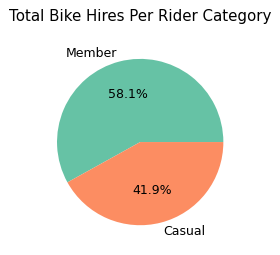

In [ ]:
# Pie chart to show riders per category
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)
labels = ["Member", "Casual"]
plt.pie(x=total_riders, autopct="%.1f%%", labels=labels)
ax.set_title("Total Bike Hires Per Rider Category", pad=14, loc="center")
plt.show()

In [ ]:
# Find out how bike hires were distibuted throughout the year
ride_hires_per_month = (
    clean_df["month"]
    .value_counts(sort=False)
    .rename_axis("Month")
    .reset_index(name="Total Hires")
)

In [ ]:
months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
print(ride_hires_per_month)

    Month  Total Hires
0       5       450951
1       4       298199
2       3       205687
3       2        42994
4       1        83508
5      12       113539
6      11       205908
7      10       213843
8       9       261416
9       8       276877
10      7       312165
11      6       342040


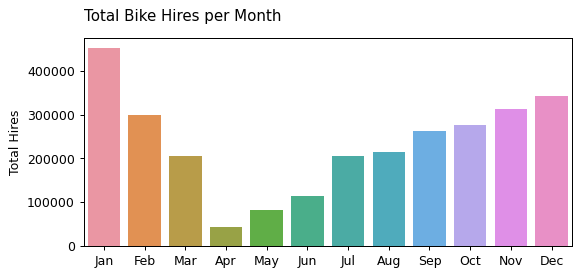

In [ ]:
plt.figure(figsize=(7, 3), dpi=90)
plt.title("Total Bike Hires per Month", loc="left", pad=14)
sns.barplot(data=ride_hires_per_month, x=months, y="Total Hires")
plt.show()

In [ ]:
# Find out what days of the week have the most bike hires
ride_hires_per_day = (
    clean_df["day_of_week"]
    .value_counts()
    .rename_axis("Day")
    .reset_index(name="Total Hires")
)
ride_hires_per_day.sort_values(by=["Total Hires"], inplace=True, ascending=True)
print(ride_hires_per_day)

         Day  Total Hires
6    Tuesday       351736
5     Monday       353776
4  Wednesday       360717
3   Thursday       364617
2     Friday       404976
1     Sunday       448054
0   Saturday       523251


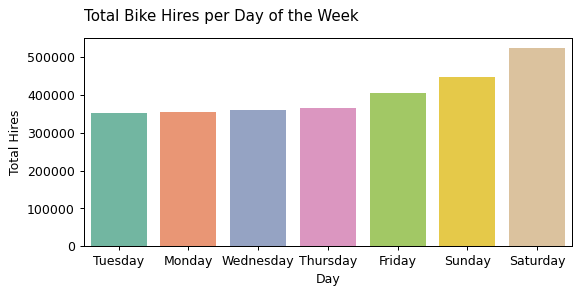

In [ ]:
plt.figure(figsize=(7, 3), dpi=90)
plt.title("Total Bike Hires per Day of the Week", loc="left", pad=14)
sns.barplot(data=ride_hires_per_day, x="Day", y="Total Hires")
plt.show()

# BIKE HIRES PER CATEGORY PER MONTH
# Find out how ridership compares everymonth for the two rider categories

In [ ]:

monthly_bike_hires_per_customer_category = clean_df.groupby(["member_casual"])[
    "month_name"
].value_counts(sort=True)

In [ ]:
monthly_casual_member_df = pd.DataFrame()
monthly_casual_member_df["casual"] = monthly_bike_hires_per_customer_category["casual"]
monthly_casual_member_df["member"] = monthly_bike_hires_per_customer_category["member"]
monthly_casual_member_df["Month"] = monthly_casual_member_df.index

In [ ]:
print(monthly_casual_member_df)

            casual  member Month
month_name                      
May         216796  234155   May
Jun         154329  187711   Jun
Jul         152354  159811   Jul
Aug         135368  141509   Aug
Apr         120418  177781   Apr
Sep         116108  145308   Sep
Oct          89459  124384   Oct
Mar          75641  130046   Mar
Nov          69200  136708   Nov
Dec          24492   89047   Dec
Jan          14690   68818   Jan
Feb           8613   34381   Feb


In [ ]:
pos = list(range(len(monthly_casual_member_df["casual"])))
width = 0.25

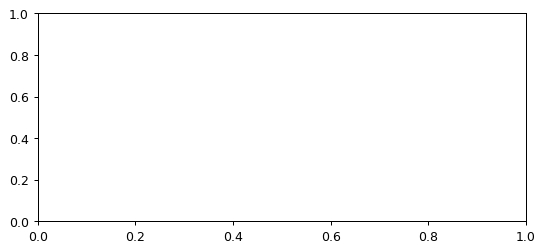

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

<BarContainer object of 12 artists>

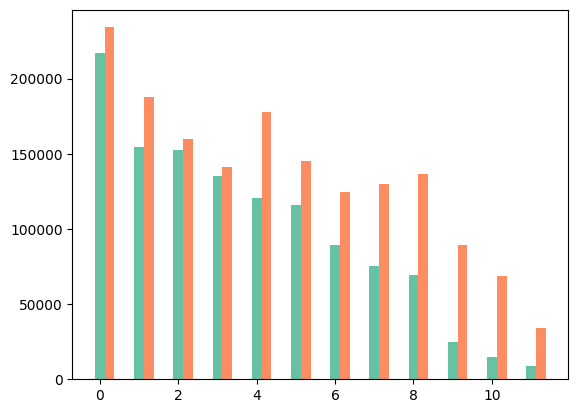

In [ ]:
plt.bar(pos, monthly_casual_member_df["casual"], width)
plt.bar([p + width for p in pos], monthly_casual_member_df["member"], width)

In [ ]:
# Setting the y and x axis label
ax.set_ylabel("Total Hires")
ax.set_xlabel("Month")
# Setting the chart's title
ax.set_title("Total Bike Hires per Rider Category per Month", loc="left", pad=14)

Text(0.0, 1.0, 'Total Bike Hires per Rider Category per Month')

In [ ]:
# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

In [ ]:
# Setting the labels for the x ticks
ax.set_xticklabels(monthly_casual_member_df["Month"])

[Text(0.375, 0, 'May'),
 Text(1.375, 0, 'Jun'),
 Text(2.375, 0, 'Jul'),
 Text(3.375, 0, 'Aug'),
 Text(4.375, 0, 'Apr'),
 Text(5.375, 0, 'Sep'),
 Text(6.375, 0, 'Oct'),
 Text(7.375, 0, 'Mar'),
 Text(8.375, 0, 'Nov'),
 Text(9.375, 0, 'Dec'),
 Text(10.375, 0, 'Jan'),
 Text(11.375, 0, 'Feb')]

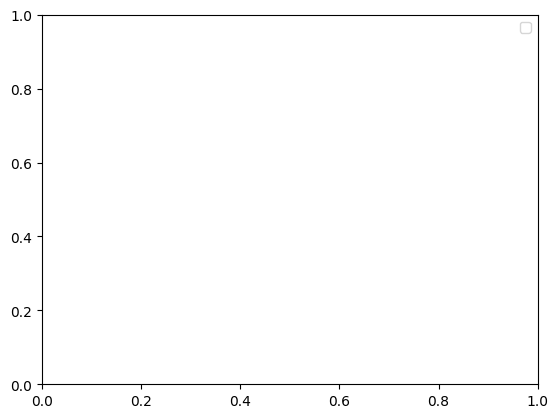

In [ ]:
# Adding the legend and showing the plot
plt.legend(["Casual", "Member"], loc="upper right")
plt.show()


# BIKE HIRES PER CATEGORY PER DAY
# Find out how ridership compares everyday for the two rider categories

In [ ]:
bike_hires_per_customer_category = clean_df.groupby(["member_casual"])[
    "day_of_week"
].value_counts(sort=True)
print(bike_hires_per_customer_category)

member_casual  day_of_week
casual         Saturday       275048
               Sunday         233079
               Friday         165325
               Monday         131496
               Thursday       129326
               Wednesday      122066
               Tuesday        121128
member         Saturday       248203
               Friday         239651
               Wednesday      238651
               Thursday       235291
               Tuesday        230608
               Monday         222280
               Sunday         214975
Name: day_of_week, dtype: int64


In [ ]:
casual_member_df = pd.DataFrame()
casual_member_df["casual"] = bike_hires_per_customer_category["casual"]
casual_member_df["member"] = bike_hires_per_customer_category["member"]
casual_member_df["Day"] = casual_member_df.index

In [ ]:
print(casual_member_df)

             casual  member        Day
day_of_week                           
Saturday     275048  248203   Saturday
Sunday       233079  214975     Sunday
Friday       165325  239651     Friday
Monday       131496  222280     Monday
Thursday     129326  235291   Thursday
Wednesday    122066  238651  Wednesday
Tuesday      121128  230608    Tuesday


In [ ]:
pos = list(range(len(casual_member_df["casual"])))
width = 0.25

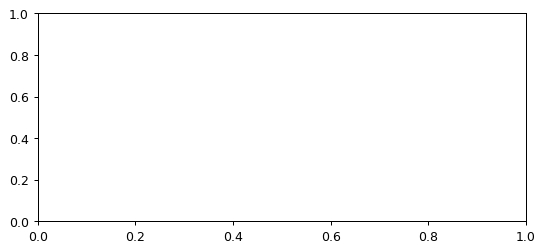

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

<BarContainer object of 7 artists>

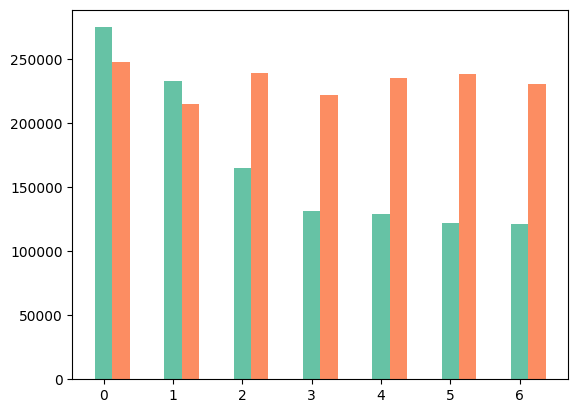

In [ ]:
plt.bar(pos, casual_member_df["casual"], width)
plt.bar([p + width for p in pos], casual_member_df["member"], width)

In [ ]:
# Setting the y and x axis label
ax.set_ylabel("Total Hires")
ax.set_xlabel("Day of the Week")
# Setting the chart's title
ax.set_title("Total Bike Hires per Rider Category per Day", loc="left", pad=14)

Text(0.0, 1.0, 'Total Bike Hires per Rider Category per Day')

In [ ]:
# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

In [ ]:
# Setting the labels for the x ticks
ax.set_xticklabels(casual_member_df["Day"])

[Text(0.375, 0, 'Saturday'),
 Text(1.375, 0, 'Sunday'),
 Text(2.375, 0, 'Friday'),
 Text(3.375, 0, 'Monday'),
 Text(4.375, 0, 'Thursday'),
 Text(5.375, 0, 'Wednesday'),
 Text(6.375, 0, 'Tuesday')]

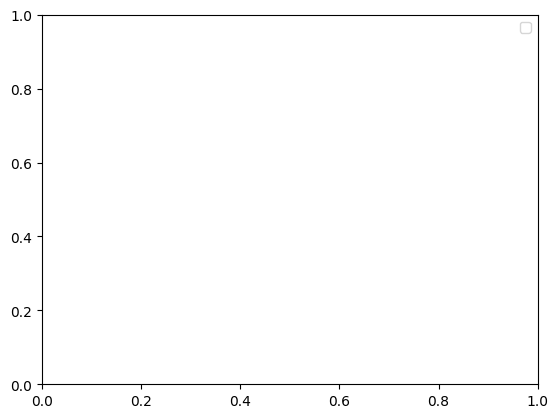

In [ ]:
# Adding the legend and showing the plot
plt.legend(["Casual", "Member"], loc="upper right")
plt.show()

In [ ]:
# AVERAGE RIDE LENGTH PER CATEGORY
average_ride_length = clean_df.groupby(["member_casual"])["ride_length"].mean()
print(f"The average ride length per category {average_ride_length}")

The average ride length per category member_casual
casual    41.433866
member    15.087977
Name: ride_length, dtype: float64


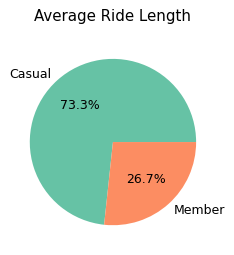

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)
labels = ["Casual", "Member"]
plt.pie(x=average_ride_length, autopct="%.1f%%", labels=labels)
ax.set_title("Average Ride Length", pad=14, loc="center")
plt.show()

# AVERAGE RIDE LENGTH FOR RIDERS BY DAY OF THE WEEK

In [ ]:
average_daily_ride_length = clean_df.groupby(["member_casual", "day_of_week"])[
    "ride_length"
].mean()
print(f"Average ride lenth per category per day {average_daily_ride_length}")

Average ride lenth per category per day member_casual  day_of_week
casual         Friday         39.353269
               Monday         40.921048
               Saturday       42.812270
               Sunday         47.426108
               Thursday       38.774720
               Tuesday        37.630780
               Wednesday      36.847590
member         Friday         14.683992
               Monday         14.301764
               Saturday       16.579240
               Sunday         17.223384
               Thursday       14.306163
               Tuesday        14.171906
               Wednesday      14.407429
Name: ride_length, dtype: float64


In [ ]:
weekly_average_ride_length_df = pd.DataFrame()

In [ ]:
weekly_average_ride_length_df["casual"] = average_daily_ride_length["casual"]
weekly_average_ride_length_df["member"] = average_daily_ride_length["member"]
weekly_average_ride_length_df["Day"] = weekly_average_ride_length_df.index

In [ ]:
print(weekly_average_ride_length_df)

                casual     member        Day
day_of_week                                 
Friday       39.353269  14.683992     Friday
Monday       40.921048  14.301764     Monday
Saturday     42.812270  16.579240   Saturday
Sunday       47.426108  17.223384     Sunday
Thursday     38.774720  14.306163   Thursday
Tuesday      37.630780  14.171906    Tuesday
Wednesday    36.847590  14.407429  Wednesday


In [ ]:
pos = list(range(len(weekly_average_ride_length_df["casual"])))
width = 0.25

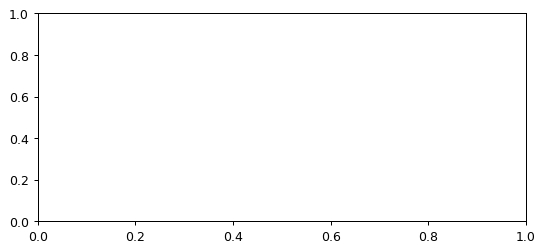

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

<BarContainer object of 7 artists>

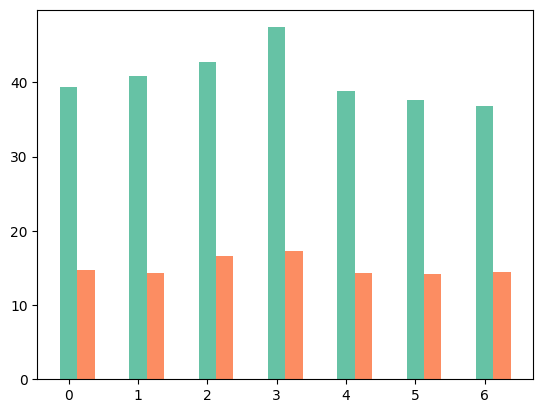

In [ ]:
plt.bar(pos, weekly_average_ride_length_df["casual"], width)
plt.bar([p + width for p in pos], weekly_average_ride_length_df["member"], width)

In [ ]:
# Setting the y and x axis label
ax.set_ylabel("Average Ride Length")
ax.set_xlabel("Day of the Week")
# Setting the chart's title
ax.set_title("Average Ride Length per Rider Category per Day", loc="left", pad=14)

Text(0.0, 1.0, 'Average Ride Length per Rider Category per Day')

In [ ]:
# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

In [ ]:
# Setting the labels for the x ticks
ax.set_xticklabels(weekly_average_ride_length_df["Day"])

[Text(0.375, 0, 'Friday'),
 Text(1.375, 0, 'Monday'),
 Text(2.375, 0, 'Saturday'),
 Text(3.375, 0, 'Sunday'),
 Text(4.375, 0, 'Thursday'),
 Text(5.375, 0, 'Tuesday'),
 Text(6.375, 0, 'Wednesday')]

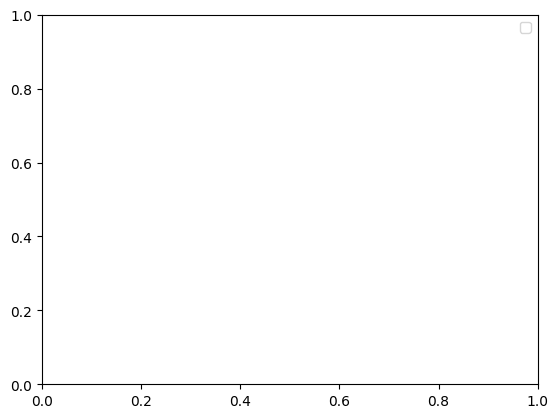

In [ ]:
# Adding the legend and showing the plot
plt.legend(["Casual", "Member"], loc="upper right")
plt.show()

# AVERAGE RIDE LENGTH FOR RIDERS BY MONTH

In [ ]:
average_daily_ride_length_per_month = clean_df.groupby(["member_casual", "month"])[
    "ride_length"
].mean()
print(f"Average ride lenth per category per day {average_daily_ride_length_per_month}")

Average ride lenth per category per day member_casual  month
casual         1        26.369980
               2        47.137136
               3        38.480475
               4        38.441720
               5        37.425277
               6        51.233166
               7        59.328395
               8        40.742401
               9        37.331759
               10       28.548463
               11       33.445446
               12       27.621278
member         1        12.031133
               2        14.781198
               3        13.665306
               4        14.263098
               5        14.344059
               6        18.540866
               7        17.618356
               8        16.810500
               9        15.368996
               10       13.909278
               11       13.480941
               12       12.347370
Name: ride_length, dtype: float64


In [ ]:
monthly_average_ride_length_df = pd.DataFrame()

In [ ]:
monthly_average_ride_length_df["casual"] = average_daily_ride_length_per_month["casual"]
monthly_average_ride_length_df["member"] = average_daily_ride_length_per_month["member"]
monthly_average_ride_length_df["month"] = monthly_average_ride_length_df.index

In [ ]:
print(monthly_average_ride_length_df)

          casual     member  month
month                             
1      26.369980  12.031133      1
2      47.137136  14.781198      2
3      38.480475  13.665306      3
4      38.441720  14.263098      4
5      37.425277  14.344059      5
6      51.233166  18.540866      6
7      59.328395  17.618356      7
8      40.742401  16.810500      8
9      37.331759  15.368996      9
10     28.548463  13.909278     10
11     33.445446  13.480941     11
12     27.621278  12.347370     12


In [ ]:
pos = list(range(len(monthly_average_ride_length_df["casual"])))
width = 0.25

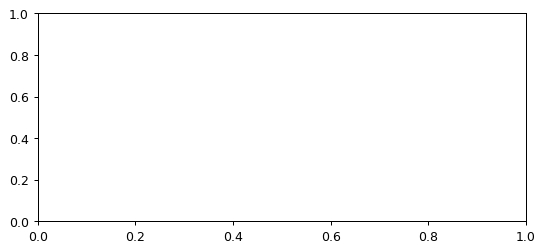

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

<BarContainer object of 12 artists>

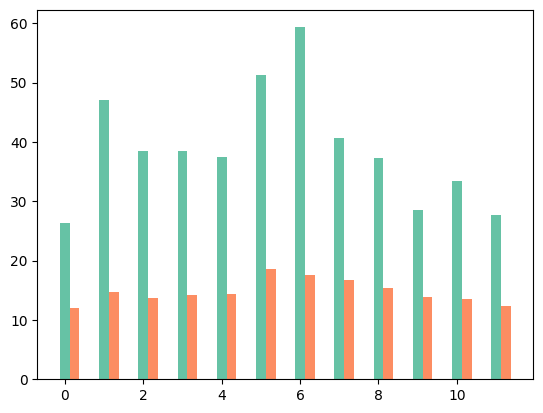

In [ ]:
plt.bar(pos, monthly_average_ride_length_df["casual"], width)
plt.bar([p + width for p in pos], monthly_average_ride_length_df["member"], width)

In [ ]:
# Setting the y and x axis label
ax.set_ylabel("Average Ride Length")
ax.set_xlabel("Month")
# Setting the chart's title
ax.set_title("Average Ride Length per Rider Category per Month", loc="left", pad=14)

Text(0.0, 1.0, 'Average Ride Length per Rider Category per Month')

In [ ]:
# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

In [ ]:
# Setting the labels for the x ticks
ax.set_xticklabels(months)

[Text(0.375, 0, 'Jan'),
 Text(1.375, 0, 'Feb'),
 Text(2.375, 0, 'Mar'),
 Text(3.375, 0, 'Apr'),
 Text(4.375, 0, 'May'),
 Text(5.375, 0, 'Jun'),
 Text(6.375, 0, 'Jul'),
 Text(7.375, 0, 'Aug'),
 Text(8.375, 0, 'Sep'),
 Text(9.375, 0, 'Oct'),
 Text(10.375, 0, 'Nov'),
 Text(11.375, 0, 'Dec')]

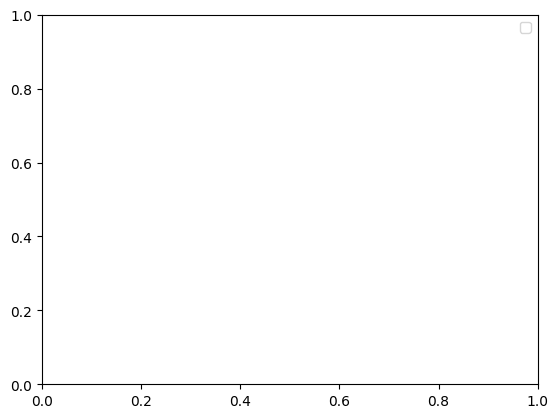

In [ ]:
# Adding the legend and showing the plot
plt.legend(["Casual", "Member"], loc="upper right")
plt.show()

In [ ]:
# RIDEABLE TYPE PER RIDER CATEGORY
type_of_bike = clean_df.groupby(["member_casual"])["rideable_type"].value_counts()
print(type_of_bike)

member_casual  rideable_type
casual         docked_bike      687866
               classic_bike     264398
               electric_bike    225204
member         docked_bike      786344
               classic_bike     576650
               electric_bike    266665
Name: rideable_type, dtype: int64
